##Prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from collections import Counter
import datetime
from scipy import stats
%matplotlib inline
import os
import datetime as dt
import missingno as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


##Memory Reduction

In [3]:
data_folder = '/content/drive/MyDrive/Data Mining/Project/Data'
# List all files in the folder
files = os.listdir(data_folder)

# Iterate over each file and read it into a DataFrame
dataframes = {}
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(data_folder, file)
        df_name = file.split('.')[0]  # Use file name without extension as DataFrame name
        dataframes[df_name] = pd.read_csv(file_path)

# Access each DataFrame by its name
members = dataframes['members']
user_logs= dataframes['user_logs']
transactions= dataframes['transactions']
train = dataframes['train']
test = dataframes['test']

In [5]:

print('File sizes before reduction :')

print('Members :' + str(members.memory_usage().sum()/1023**2) + " MB")
print('Transactions :' + str(transactions.memory_usage().sum()/1023**2) + " MB")
print('User-logs :' + str(user_logs.memory_usage().sum()/1023**2) + " MB")
print('Train :' + str(train.memory_usage().sum()/1023**2) + " MB")

members['registration_init_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[:4]))
members['registration_init_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_init_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[-2:]))

members['registration_init_year'] = members['registration_init_year'].astype(np.int16)
members['registration_init_month'] = members['registration_init_month'].astype(np.int8)
members['registration_init_date'] = members['registration_init_date'].astype(np.int8)

members['city'] = members['city'].astype(np.int8)
members['bd'] = members['bd'].astype(np.int16)
members['registered_via'] = members['registered_via'].astype(np.int8)
members['registration_init_year'] = members['registration_init_year'].astype(np.int16)
members['registration_init_month'] = members['registration_init_month'].astype(np.int8)
members['registration_init_date'] = members['registration_init_date'].astype(np.int8)

transactions['transaction_date_year'] = transactions['transaction_date'].apply(lambda x: int(str(x)[:4]))
transactions['transaction_date_month'] = transactions['transaction_date'].apply(lambda x: int(str(x)[4:6]))
transactions['transaction_date_date'] = transactions['transaction_date'].apply(lambda x: int(str(x)[-2:]))

transactions['membership_expire_date_year'] = transactions['membership_expire_date'].apply(lambda x: int(str(x)[:4]))
transactions['membership_expire_date_month'] = transactions['membership_expire_date'].apply(lambda x: int(str(x)[4:6]))
transactions['membership_expire_date_date'] = transactions['membership_expire_date'].apply(lambda x: int(str(x)[-2:]))

transactions['transaction_date_year'] = transactions['transaction_date_year'].astype(np.int16)
transactions['transaction_date_month'] = transactions['transaction_date_month'].astype(np.int8)
transactions['transaction_date_date'] = transactions['transaction_date_date'].astype(np.int8)

transactions['membership_expire_date_year'] = transactions['membership_expire_date_year'].astype(np.int16)
transactions['membership_expire_date_month'] = transactions['membership_expire_date_month'].astype(np.int8)
transactions['membership_expire_date_date'] = transactions['membership_expire_date_date'].astype(np.int8)

transactions['payment_method_id'] = transactions['payment_method_id'].astype(np.int8)
transactions['payment_plan_days'] = transactions['payment_plan_days'].astype(np.int16)
transactions['plan_list_price'] = transactions['plan_list_price'].astype(np.int16)
transactions['actual_amount_paid'] = transactions['actual_amount_paid'].astype(np.int16)
transactions['is_auto_renew'] = transactions['is_auto_renew'].astype(np.int8)
transactions['is_cancel'] = transactions['is_cancel'].astype(np.int8)

user_logs['date_year'] = user_logs['date'].apply(lambda x: int(str(x)[:4]))
user_logs['date_month'] = user_logs['date'].apply(lambda x: int(str(x)[4:6]))
user_logs['date_date'] = user_logs['date'].apply(lambda x: int(str(x)[-2:]))

user_logs['date_year'] = user_logs['date_year'].astype(np.int16)
user_logs['date_month'] = user_logs['date_month'].astype(np.int8)
user_logs['date_date'] = user_logs['date_date'].astype(np.int8)

user_logs['num_25'] = user_logs['num_25'].astype(np.int16)
user_logs['num_50'] = user_logs['num_50'].astype(np.int16)
user_logs['num_75'] = user_logs['num_75'].astype(np.int16)
user_logs['num_985'] = user_logs['num_985'].astype(np.int16)
user_logs['num_100'] = user_logs['num_100'].astype(np.int32)
user_logs['num_unq'] = user_logs['num_unq'].astype(np.int16)

train['is_churn'] = train['is_churn'].astype(np.int8)

members = members.drop(columns='registration_init_time')
transactions = transactions.drop(columns='membership_expire_date')
user_logs = user_logs.drop(columns='date')

print('File sizes after reduction :')

print(members.memory_usage().sum()/1023**2,"MB")
print(transactions.memory_usage(index=True).sum()/ 1024**2," MB")
print(user_logs.memory_usage().sum()/1023**2,"MB")
print(user_logs.memory_usage().sum()/1023**2,"MB")

File sizes before reduction :
Members :310.4881298081563 MB
Transactions :98.45190720945143 MB
User-logs :1265.6488181407299 MB
Train :14.844775443394306 MB
File sizes after reduction :
155.24412605861855 MB
45.035767555236816  MB
597.6675620073596 MB
597.6675620073596 MB


##EDA

Chrun Percentage

The following EDA Plots were constructed to better understand the data : 
Churn Percentage: 8.994191315811156


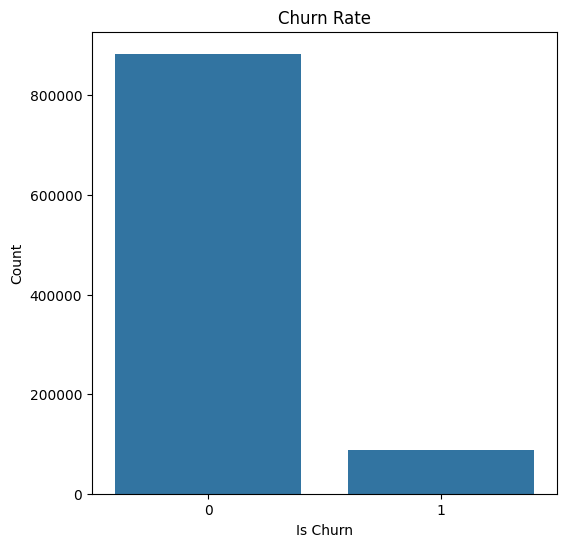

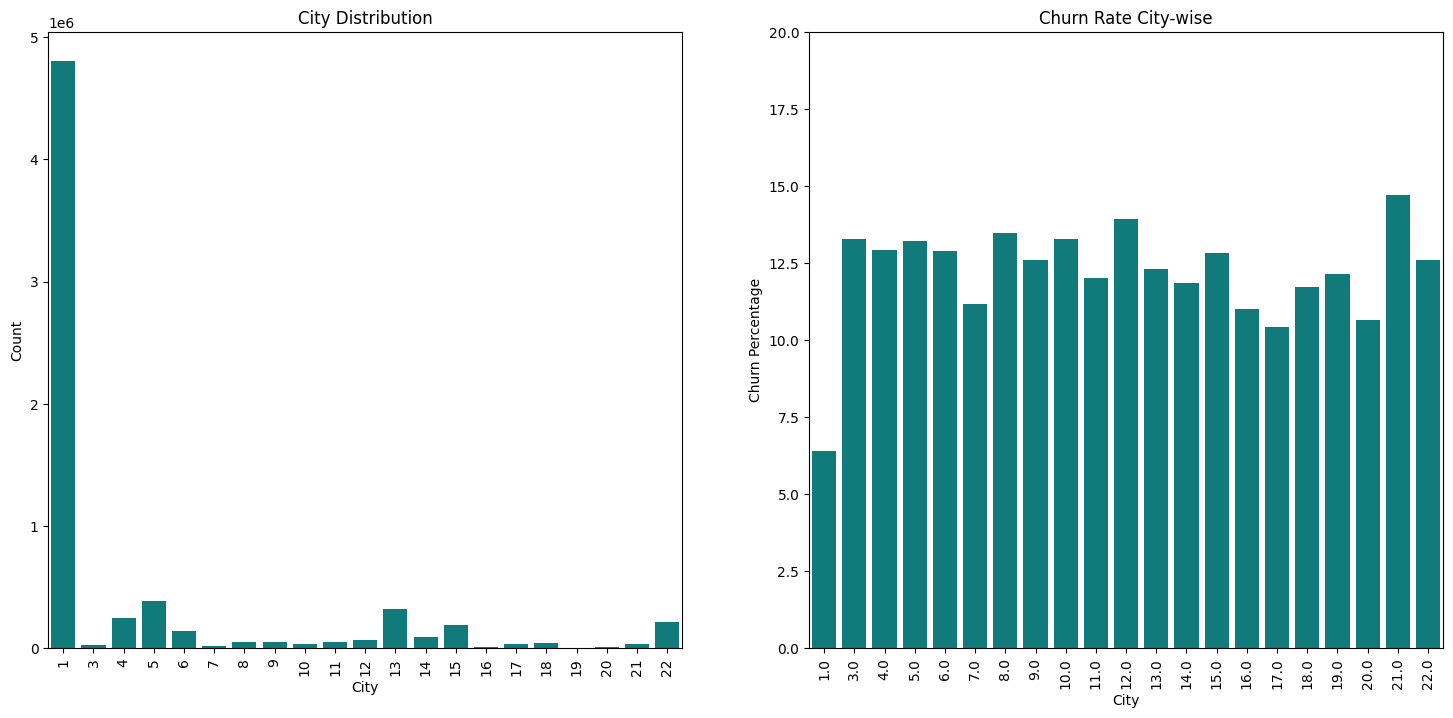

There are actually 21 cities, not one city “2”. The majority come from city 1. All the rest of the cities look similarly unpopular.
The cities are similar in churn rates, except for the city containing the largest number of samples. churn rate in the most popular city is much lower than in all other cities, and this affects the overall rate significantly.


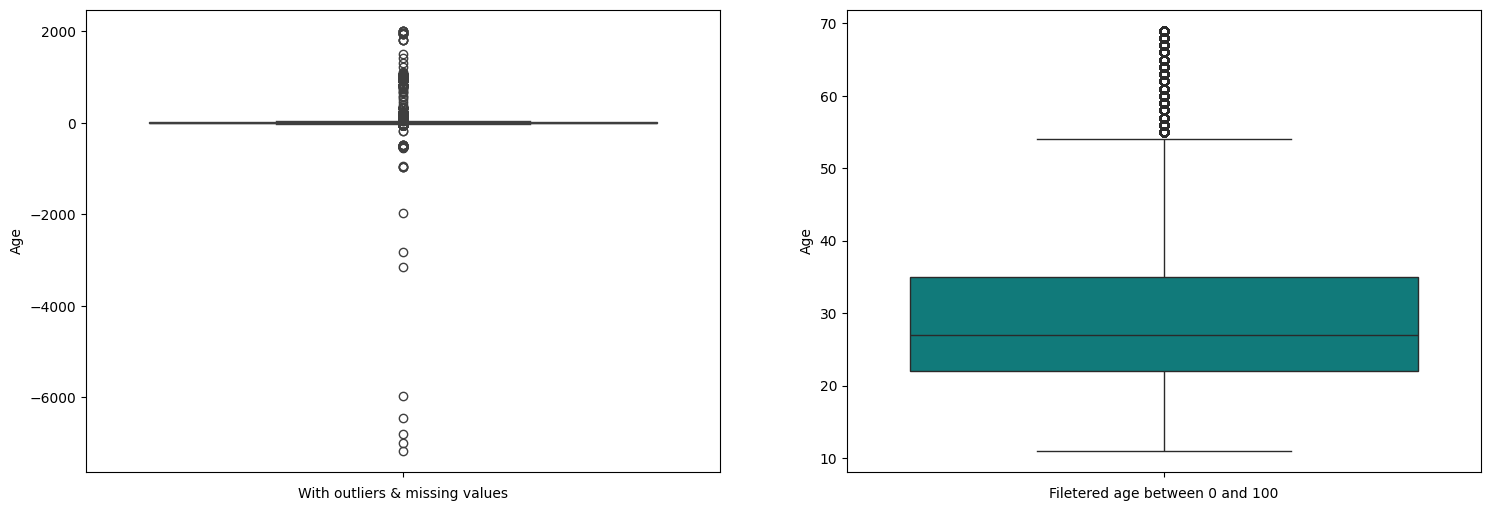

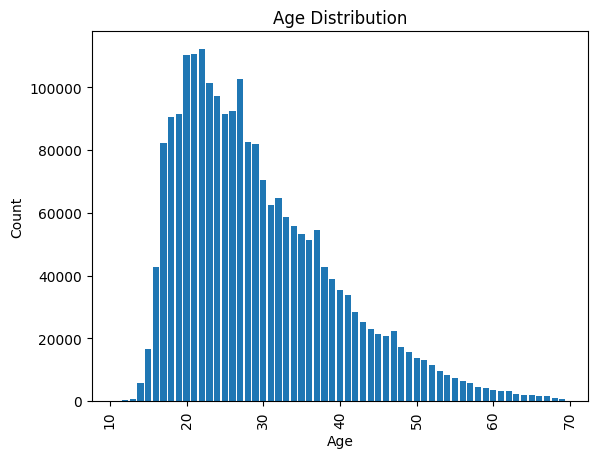

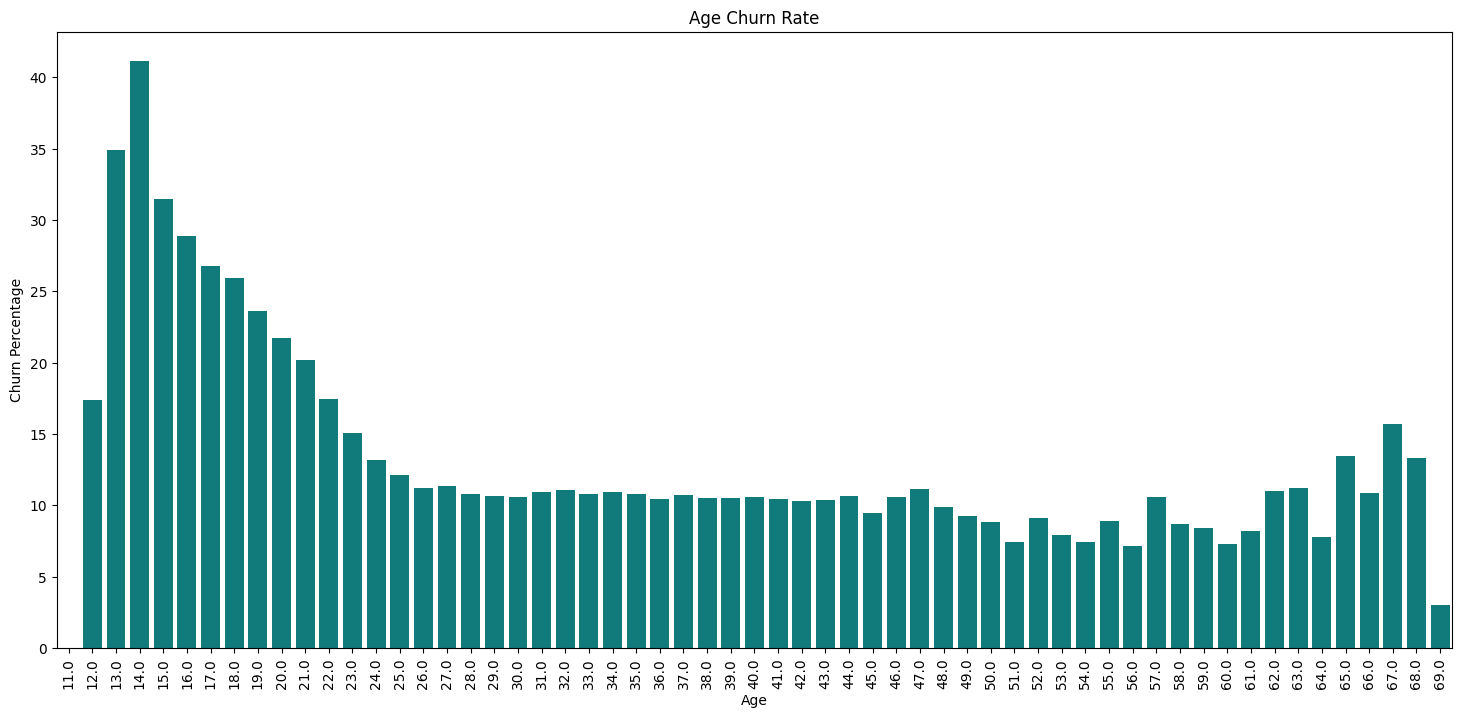

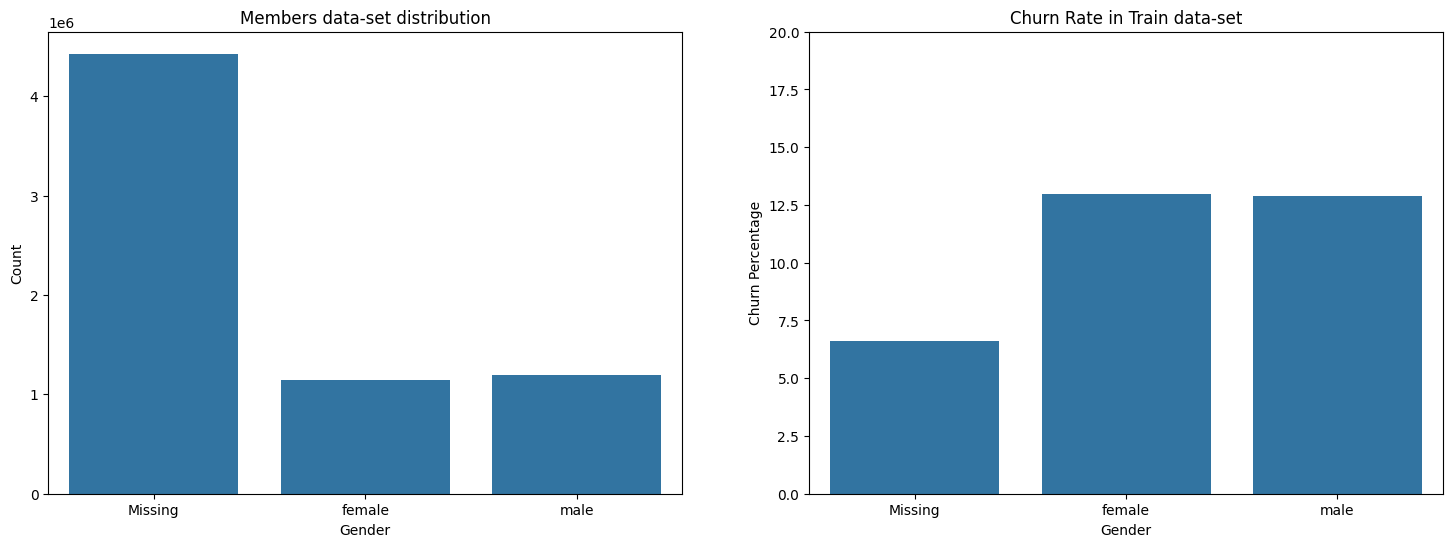

 Around 60% of the age data is missing after the merge. With the data we have, it seems both male and female are churning quite similar. So we may want to drop it all togeather 


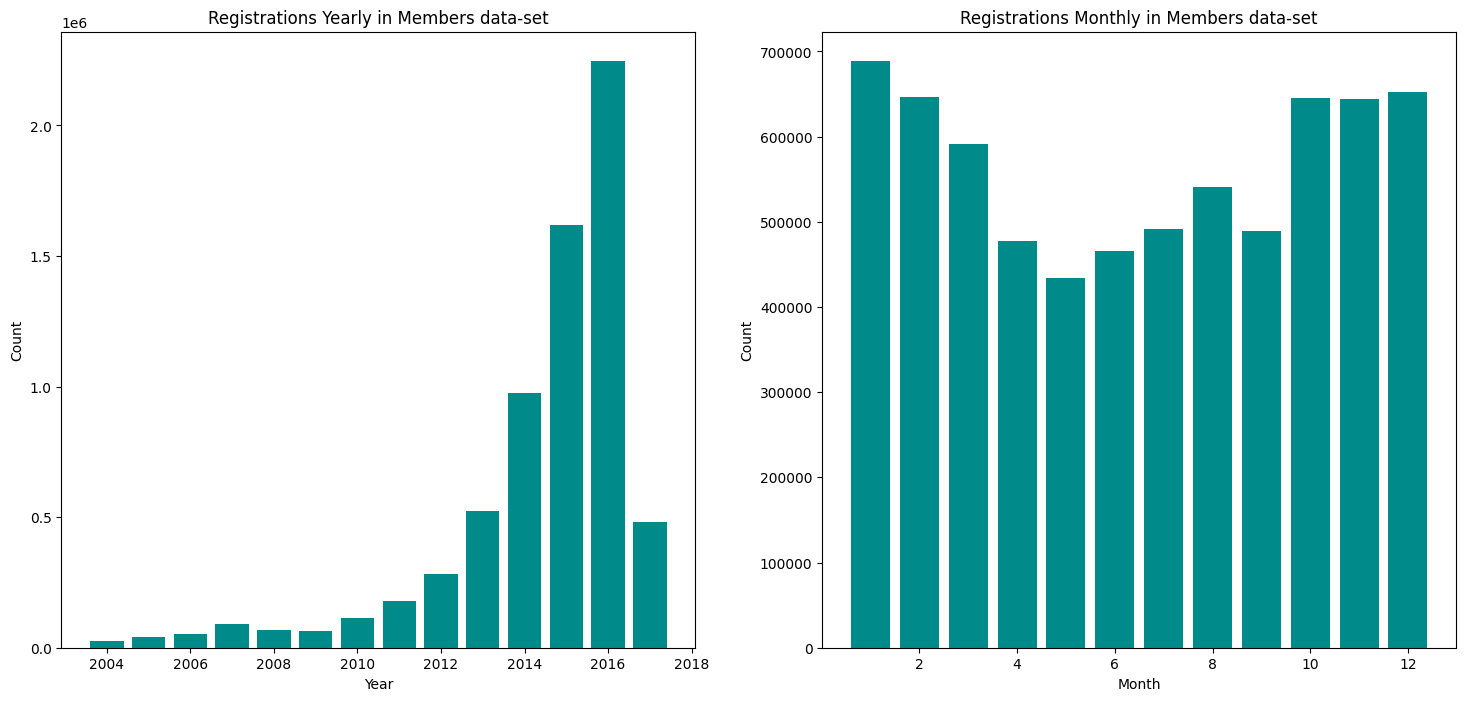

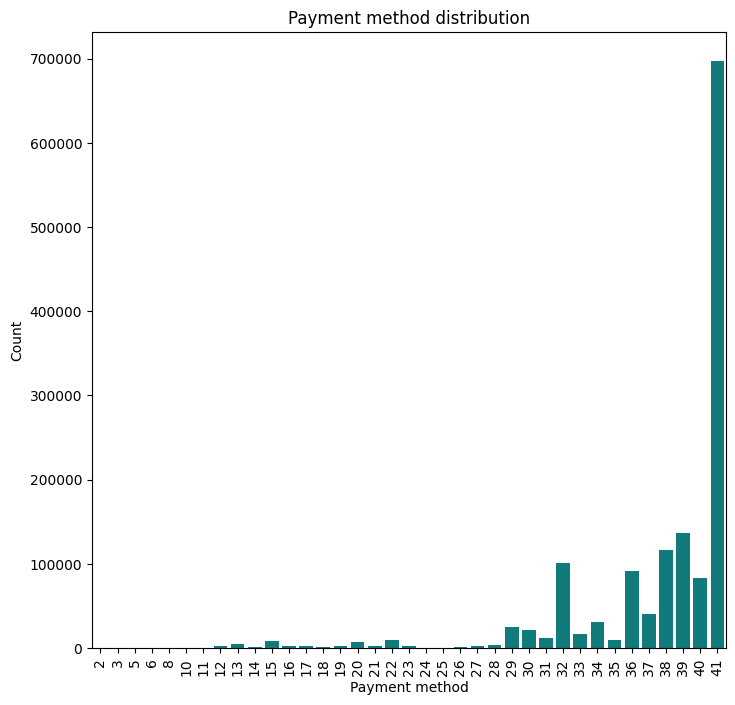

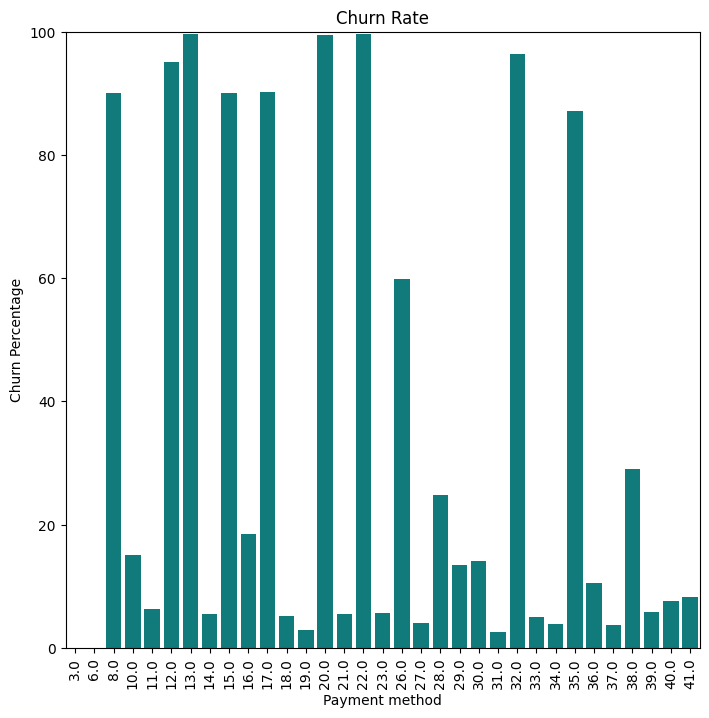

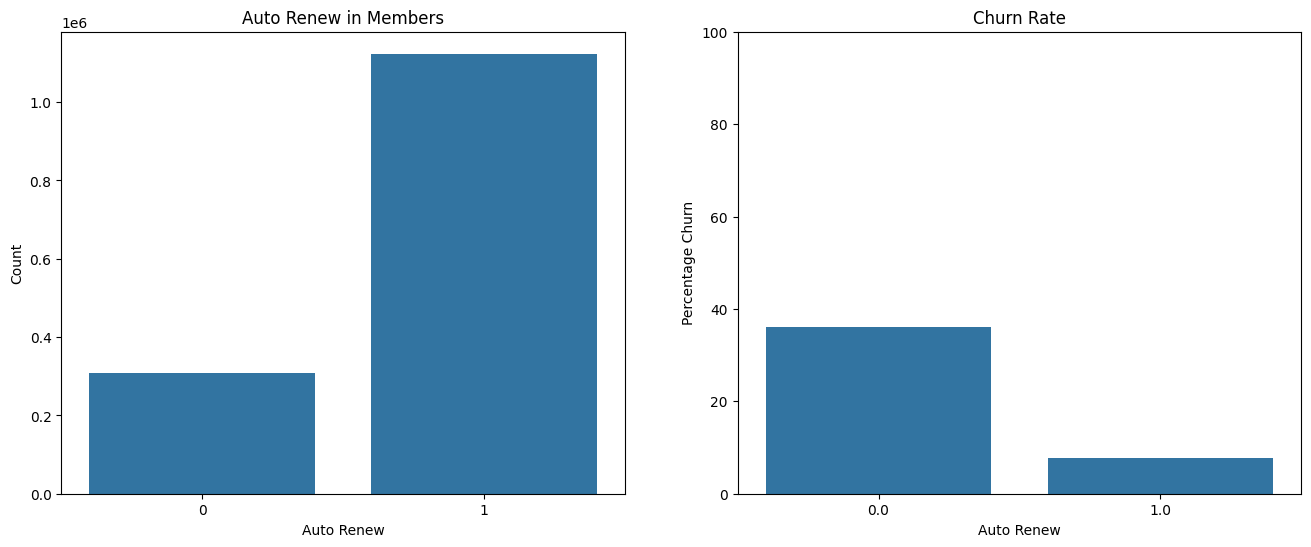

In [6]:
print("The following EDA Plots were constructed to better understand the data : ")

plt.figure(figsize=(6,6))
sns.countplot(x="is_churn", data=train)
print('Churn Percentage: ' + str(87330/970960 * 100))
plt.title('Churn Rate')
plt.xlabel('Is Churn')
plt.ylabel('Count')
plt.savefig('Churn Percentage.png')

x1 = pd.merge(train,members, on='msno', how='left')

plt.figure(figsize=(18,8))
plt.subplot(121)
sns.countplot(x="city", data=members, color = 'darkcyan')
plt.xlabel('City')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('City Distribution')

plt.subplot(122)
a = x1.groupby(['city','is_churn'])['msno'].count().reset_index()
a = pd.pivot_table(a, values='msno', index='city',columns='is_churn')
a['city_churn_percentage'] = (a[1]/(a[0] + a[1]))*100
a = a.reset_index()
sns.barplot(x = 'city', y = 'city_churn_percentage',data = a, color = 'darkcyan')
plt.ylim(0, 20)
plt.title('Churn Rate City-wise')
plt.xlabel('City')
plt.ylabel('Churn Percentage')
plt.xticks(rotation = 90)
plt.savefig('City Distribution.png')
plt.show()

print("There are actually 21 cities, not one city “2”. The majority come from city 1. All the rest of the cities look similarly unpopular.")
print("The cities are similar in churn rates, except for the city containing the largest number of samples. churn rate in the most popular city is much lower than in all other cities, and this affects the overall rate significantly.")

plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.boxplot(y = members.bd, data = members)
plt.xlabel('With outliers & missing values')
plt.ylabel('Age')
plt.subplot(1,2,2)
filtered_bd =members.bd[(members.bd > 10 )& (members.bd < 70)]
sns.boxplot(y = filtered_bd, data = members, color = 'darkcyan')
plt.xlabel('Filetered age between 0 and 100')
plt.ylabel('Age')
plt.savefig('Age-outliers.png')
plt.show()

print(" ")

# prompt: plot the bd vs count for members who's bd is between 10 and 70

filtered_bd = members.bd[(members.bd > 10) & (members.bd < 70)]

# Compute the counts once using pandas
age_counts = filtered_bd.value_counts().sort_index()

# Plot using matplotlib directly
plt.bar(age_counts.index, age_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


print("")

plt.figure(figsize = (18,8))
filtered_bd_x1 =x1[(x1.bd > 10 )& (x1.bd < 70)]

b = filtered_bd_x1.groupby(['bd','is_churn'])['msno'].count().reset_index()
b = pd.pivot_table(b, values='msno', index='bd',columns=['is_churn'])
b['age_churn_percentage'] = (b[1]/(b[0] + b[1]))*100
b = b.reset_index()
sns.barplot(x = 'bd', y = 'age_churn_percentage',data = b, color = 'darkcyan')
plt.xticks(rotation = 90)
plt.xlabel('Age')
plt.ylabel('Churn Percentage')
plt.title('Age Churn Rate')
plt.savefig('Age Churn Rate.png')
plt.show()

members['gender'] = members['gender'].fillna('Missing')
plt.figure(figsize=(18,6))
plt.subplot(121)
sns.countplot(x="gender", data=members)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Members data-set distribution')

plt.subplot(122)
c = x1.groupby(['gender', 'is_churn'])['msno'].count().reset_index()
c = pd.pivot_table(c, index = 'gender', columns = 'is_churn', values = 'msno')
c['gender_churn_percentage'] = (c[1]/ (c[0] + c[1])) * 100
c = c.reset_index()
sns.barplot(x = 'gender', y = 'gender_churn_percentage', data = c)
plt.title('Churn Rate in Train data-set')
plt.xlabel('Gender')
plt.ylabel('Churn Percentage')
plt.ylim(0, 20)
plt.savefig('Gender.png')
plt.show()

print(" Around 60% of the age data is missing after the merge. With the data we have, it seems both male and female are churning quite similar. So we may want to drop it all togeather ")

year_counts = members['registration_init_year'].value_counts().sort_index()
month_counts = members['registration_init_month'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(18,8))

# Yearly registrations
plt.subplot(121)
plt.bar(year_counts.index, year_counts.values, color='darkcyan')
plt.title('Registrations Yearly in Members data-set')
plt.xlabel('Year')
plt.ylabel('Count')

# Monthly registrations
plt.subplot(122)
plt.bar(month_counts.index, month_counts.values, color='darkcyan')
plt.title('Registrations Monthly in Members data-set')
plt.xlabel('Month')
plt.ylabel('Count')

plt.show()

x2 = pd.merge(train, transactions, on = 'msno', how = 'left')

plt.figure(figsize=(18,8))
plt.subplot(121)
sns.countplot(x="payment_method_id", data=transactions, color = 'darkcyan')
plt.xticks(rotation = 90)
plt.xlabel('Payment method')
plt.ylabel('Count')
plt.title('Payment method distribution')
plt.show()

plt.figure(figsize=(18,8))
plt.subplot(122)
df1 = x2.groupby(['payment_method_id', 'is_churn'])['msno'].count().reset_index()
df1 = pd.pivot_table(df1, index = 'payment_method_id', columns = 'is_churn', values = 'msno', aggfunc = np.sum)
df1['churn_percentage'] = (df1[1]/ (df1[0] + df1[1])) * 100
df1 = df1.reset_index()
sns.barplot(x = 'payment_method_id', y = 'churn_percentage', data = df1, color = 'darkcyan')
plt.xticks(rotation = 90)
plt.title('Churn Rate')
plt.xlabel('Payment method')
plt.ylabel('Churn Percentage')
plt.ylim(0,100)
plt.savefig('Payment method.png')
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(121)
sns.countplot(x="is_auto_renew", data=transactions)
plt.xlabel('Auto Renew')
plt.ylabel('Count')
plt.title('Auto Renew in Members')

plt.subplot(122)
df3 = x2.groupby(['is_auto_renew', 'is_churn'])['msno'].count().reset_index()
df3 = pd.pivot_table(df3, index = 'is_auto_renew', columns = 'is_churn', values = 'msno')
df3['churn_rate'] = (df3[1]/ (df3[0] + df3[1])) * 100
df3 = df3.reset_index()
sns.barplot(x = 'is_auto_renew', y = 'churn_rate', data = df3)
plt.xlabel('Auto Renew')
plt.ylabel('Percentage Churn')
plt.title('Churn Rate')
plt.ylim(0,100)
plt.savefig('Auto Renew.png')
plt.show()

x3 = pd.merge(train, user_logs, on = 'msno', how = 'left')


##Cleaning

In [ ]:
x1 = pd.merge(train, members, on = 'msno', how = 'left')

x1 = x1.drop(['bd', 'gender'], axis = 1)
x1 = x1.dropna(axis = 0, how = 'any')

# Grouping transactions by 'msno'
grouped = transactions.groupby('msno')

# Using the newer, simplified aggregation syntax
y1 = grouped.agg(
    trans_count=('msno', 'count'),
    transaction_span=('payment_plan_days', 'sum'),
    total_list_price=('plan_list_price', 'sum'),
    total_amount_paid=('actual_amount_paid', 'sum'),
    is_auto_renew=('is_auto_renew', 'max'),
    is_cancel_sum=('is_cancel', 'sum')
)

# Calculating additional columns
y1['difference_in_price_paid'] = y1['total_list_price'] - y1['total_amount_paid']
y1['amount_paid_perday'] = y1['total_amount_paid'] / y1['transaction_span']

# Reset index to make 'msno' a column again
y1.reset_index(inplace=True)

y2 = transactions.sort_values('transaction_date', ascending = False).reset_index(drop = True)
y2 = y2.drop_duplicates(subset = ['msno'], keep = 'first')
y2 = y2.drop(columns="is_auto_renew")

x2 = pd.merge(x1, y2, on = 'msno', how = 'left')
x2 = pd.merge(x2, y1, on = 'msno', how = 'left')
x2 = x2.drop(columns="transaction_date")

# Assuming user_logs is your DataFrame and it has been loaded correctly
grouped = user_logs.groupby('msno')

# Using the newer aggregation syntax with a simplified dictionary
z1 = grouped.agg(
    logs_count=('msno', 'count'),
    total_num_25=('num_25', 'sum'),
    total_num_50=('num_50', 'sum'),
    total_num_75=('num_75', 'sum'),
    total_num_985=('num_985', 'sum'),
    total_num_100=('num_100', 'sum'),
    total_num_unq=('num_unq', 'sum'),
    total_secs=('total_secs', 'sum')
)

# Reset index to turn 'msno' back into a column
z1.reset_index(inplace=True)

final = pd.merge(x2, z1, on = 'msno', how = 'left')
final = final.dropna(axis = 0, how = 'any')

In [ ]:
# prompt: export final df as a csv file and store it to my google Drive

final.to_csv('final_merged.csv')
!cp final_merged.csv "/content/drive/MyDrive/Data Mining/Project/Data/"
